In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# seaborn provides advanced visualization standards
# both matplotlib seaborn are used for visualization purpose

In [56]:
# reading the data set that is from here https://www.kaggle.com/shivamb/netflix-shows
df = pd.read_csv("netflix_titles.csv")

In [57]:
# checking to see if there are any nulls
print(df.isnull().any())

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool


In [58]:
#identified some nulls in the dataset time to clean that!!
df.isnull().sum().sum()

3036

In [59]:
# Filling Information instead of the null values like N/A  and Country Unavailable

df.director.fillna("N/A", inplace=True)
df.cast.fillna("N/A", inplace=True)
df.country.fillna("Country Unavailable", inplace=True)
df.dropna(subset=["date_added", "rating"], inplace=True) 

In [60]:
df.isnull().any()
# No missing values in the dataset from here

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [61]:
df.head() # this gives a look of first 5 records in the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,N/A,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,N/A,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,N/A,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


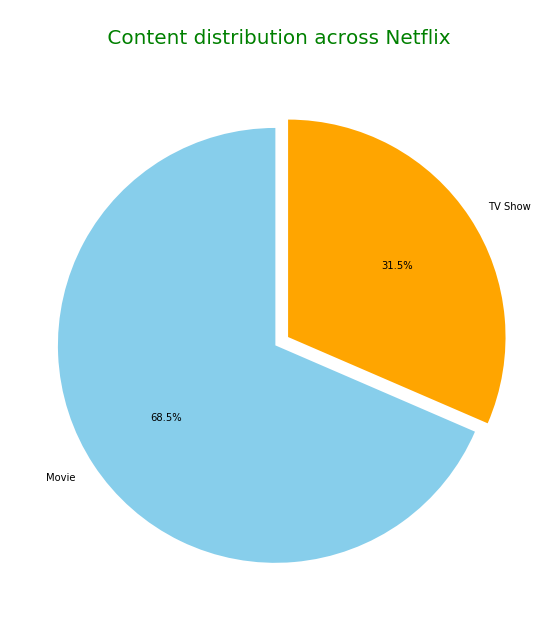

In [73]:
# Designing a plot with content distribution, this gives % of Tv shows to the % of Movies on the platform 
plt.figure(figsize=(20,10))
plt.title('\n Content distribution across Netflix \n', fontsize=20, color='green')
plt.axis("auto")
pie_chart = plt.pie(df.type.value_counts(),labels=df.type.value_counts().index,explode=(0.020,0.05),colors=['skyblue','orange'],autopct='%1.1f%%',startangle=90)


In [63]:
# Next analysis is on the content added in each year, df['date_added'] gives a df containing the year in which the content has been added
df.columns
df['date_added']
df['date_added'] = pd.to_datetime(df['date_added']) 
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,N/A,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,N/A,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,N/A,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017


In [64]:
df_shows = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

In [65]:
col='year_added'


In [66]:
# counts and % out of all the content added in a particular year
dfc_shows = df_shows[col].value_counts().reset_index()

dfc_shows = dfc_shows.rename(columns = {col : "count", "index" : col})
dfc_shows['percent'] = dfc_shows['count'].apply(lambda x : 100*x/sum(dfc_shows['count']))
dfc_shows = dfc_shows.sort_values(col)
dfc_shows

,year_added,count,percent
9,2008,1,0.051099
8,2012,3,0.153296
7,2013,6,0.306592
6,2014,6,0.306592
5,2015,32,1.635156
3,2016,191,9.759836
2,2017,387,19.775166
1,2018,491,25.089423
0,2019,803,41.032192
4,2020,37,1.890649


In [67]:
# counts and % out of all the content added in a particular year 
dfc_movies = df_movies[col].value_counts().reset_index()

dfc_movies = dfc_movies.rename(columns = {col : "count", "index" : col})
dfc_movies['percent'] = dfc_movies['count'].apply(lambda x : 100*x/sum(dfc_movies['count']))
dfc_movies = dfc_movies.sort_values(col)
dfc_movies

,year_added,count,percent
12,2008,1,0.023491
10,2009,2,0.046981
11,2010,1,0.023491
7,2011,13,0.305379
9,2012,4,0.093963
8,2013,6,0.140944
6,2014,19,0.446324
5,2015,56,1.315480
3,2016,262,6.154569
2,2017,910,21.376556


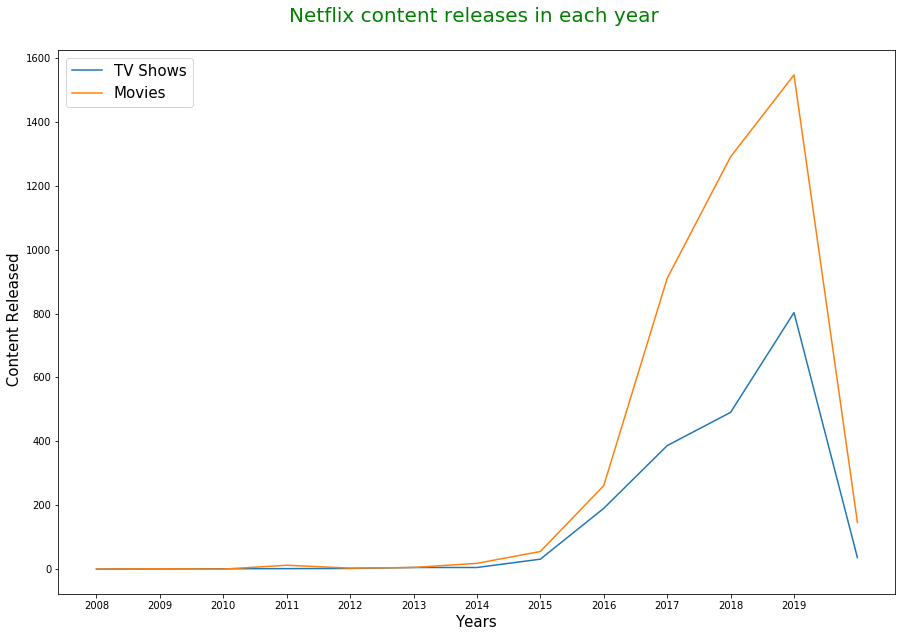

In [68]:
# finally a graph is drawn for the number of TV shows and Movies produced in each year
fig,ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=dfc_shows, x=col, y="count")
sns.lineplot(data=dfc_movies, x=col, y="count")
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Netflix content releases in each year \n" , fontsize=20, color='green')
plt.legend(['TV Shows','Movies'],fontsize=15)
plt.ylabel(' Content Released', fontsize=15, color='black')
plt.xlabel('Years',fontsize=15, color='black')
plt.show()


In [69]:
# this is inorder to identify the top countries contributing to Netflix
df_countries = df.set_index('title').country.str.split(',', expand=True).stack().reset_index(level=1, drop=True);
df_countries = df_countries[df_countries != 'Country Unavailable']
df_countries.head(10)
#df_countries contains all the countries contributing content on the platform

title
Norm of the North: King Sized Adventure     United States
Norm of the North: King Sized Adventure             India
Norm of the North: King Sized Adventure       South Korea
Norm of the North: King Sized Adventure             China
Jandino: Whatever it Takes                 United Kingdom
Transformers Prime                          United States
Transformers: Robots in Disguise            United States
#realityhigh                                United States
Apaches                                             Spain
Automata                                         Bulgaria
dtype: object

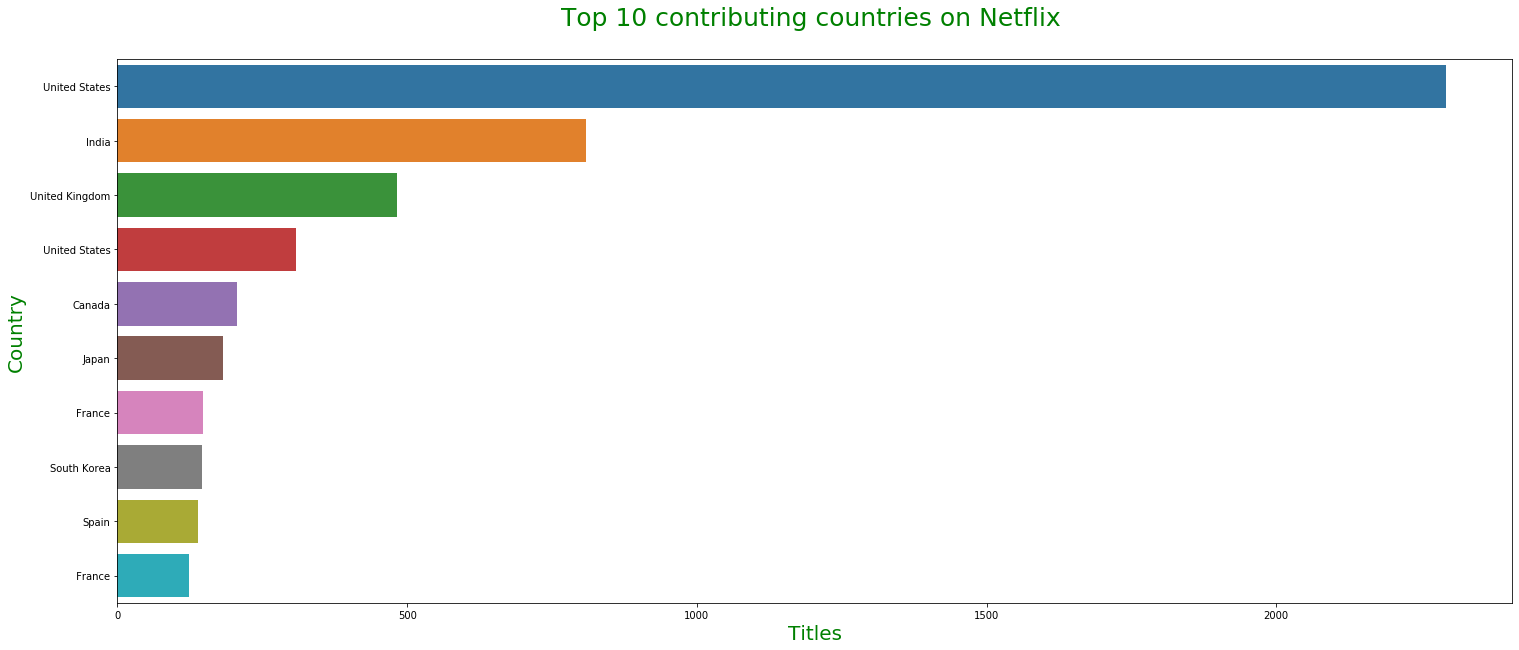

In [70]:
plt.figure(figsize=(25,10))
graph = sns.countplot(y=df_countries, order=df_countries.value_counts().index[:10])

plt.title('Top 10 contributing countries on Netflix \n', fontsize=25, color='green')
plt.xlabel('Titles',fontsize=20, color='green')  # number of titles on x-axis
plt.ylabel('Country', fontsize=20, color='green')# country names on the y-axis
plt.show()

In [71]:
# this is to identify the highest content available according to different genres 
df_genre = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

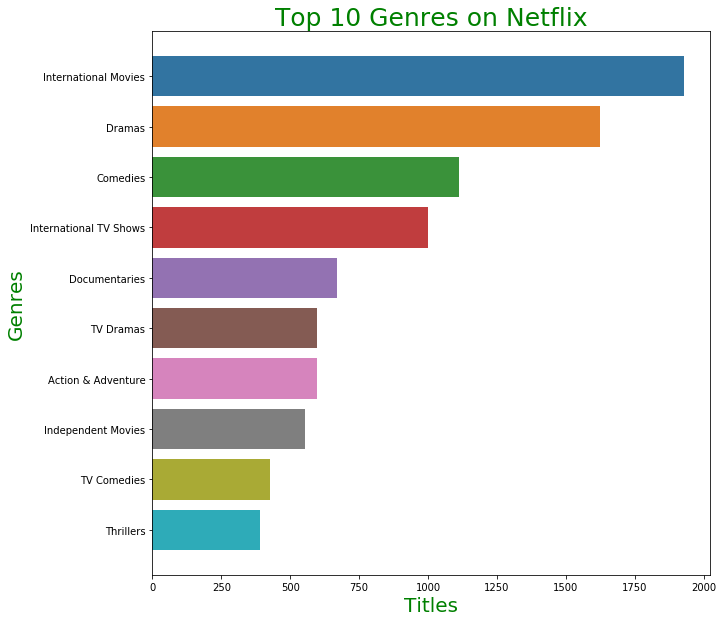

In [72]:
plt.figure(figsize=(10,10))
plot = sns.countplot(y = df_genre, order=df_genre.value_counts().index[:10])
plt.axis("auto")
plt.title('Top 10 Genres on Netflix', fontsize=25, color='green' )
plt.ylabel('Genres', fontsize=20, color='green')
plt.xlabel('Titles', fontsize=20, color='green')
plt.show()